In [53]:
import graphlab
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = graphlab.SFrame("E:\\Machine Learning\\U.W\\Regression\\kc_house_data.gl/")

This non-commercial license of GraphLab Create for academic use is assigned to lxn1021@gmail.com and will expire on November 18, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\Xiaoning\AppData\Local\Temp\graphlab_server_1544900838.log.0


In [3]:
sales.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560,2,0


In [5]:
def get_numpy_data(data_sframe, features, output):
    data_sframe["constant"] = 1
    features = ["constant"] + features
    features_sframe = data_sframe[features]
    
    feature_matrix = features_sframe.to_numpy()
    
    output_sarray = data_sframe[output]
    output_array = output_sarray.to_numpy()
    
    
    return (feature_matrix, output_array)

In [6]:
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix, weights)
    
    return predictions

In [23]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    if feature_is_constant == True:
        derivative = 2 * (errors * feature).sum()
    else:
        derivative = 2 * (errors * feature).sum() + 2 * l2_penalty * weight
    
    return derivative

In [25]:
(example_features, example_output) = get_numpy_data(sales, ["sqft_living"], "price")
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output

print feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False)
print np.sum(errors*example_features[:,1])*2+20.

print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)
print np.sum(errors)*2.

-56554166782350.0
-56554166782350.0
-22446749336.0
-22446749336.0


In [47]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    print "Starting gradient descent with l2_penalty = " + str(l2_penalty)
    
    weights = np.array(initial_weights)
    iteration = 0
    print_frequency = 1
    
    while iteration < 100:
        iteration += 1
        
        if iteration == 10:
            print_frequency = 10
        if iteration == 100:
            print_frequency = 100
        if iteration % print_frequency == 0:
            print("Iteration = " + str(iteration))
            
        predictions = predict_output(feature_matrix, weights)
        errors = predictions - output
        
        if iteration % print_frequency == 0:
            print "Cost function = ", str(np.dot(errors, errors) + l2_penalty * (np.dot(weights, weights) - weights[0] ** 2))
        
        derivative = np.zeros(len(weights))
        for i in range(len(weights)):
            if i == 0:
                derivative[i] = feature_derivative_ridge(errors, feature_matrix[:, i], weights[i], l2_penalty, True)
            else:
                derivative[i] = feature_derivative_ridge(errors, feature_matrix[:, i], weights[i], l2_penalty, False)
        
        weights = weights - step_size * derivative
    
    
    print "Done with gradient descent at iteration ", iteration
    print "Learned weights = ", str(weights)
    
    return weights

In [32]:
simple_features = ["sqft_living"]
my_output = "price"

In [33]:
train_data, test_data = sales.random_split(0.8, seed = 0)

In [36]:
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [37]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations = 1000

1. Question 1
We run ridge regression to learn the weights of a simple model that has a single feature (sqft_living), once with l2_penalty=0.0 and once with l2_penalty=1e11.

What is the value of the coefficient for sqft_living that you learned with no regularization, rounded to 1 decimal place? Use American-style decimals (e.g. 30.5)

In [48]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, 0, max_iterations = 100)

Starting gradient descent with l2_penalty = 0
Iteration = 1
Cost function =  7433051851026171.0
Iteration = 2
Cost function =  5394267213135526.0
Iteration = 3
Cost function =  4023237736501159.0
Iteration = 4
Cost function =  3101256183922414.5
Iteration = 5
Cost function =  2481247644505113.5
Iteration = 6
Cost function =  2064308077891941.5
Iteration = 7
Cost function =  1783927097372279.5
Iteration = 8
Cost function =  1595378203154871.8
Iteration = 9
Cost function =  1468583991054997.2
Iteration = 10
Cost function =  1383318191484981.8
Iteration = 20
Cost function =  1211562140496239.0
Iteration = 30
Cost function =  1208313762678823.0
Iteration = 40
Cost function =  1208252326252869.8
Iteration = 50
Cost function =  1208251163612919.5
Iteration = 60
Cost function =  1208251140915263.0
Iteration = 70
Cost function =  1208251139777036.0
Iteration = 80
Cost function =  1208251139046557.0
Iteration = 90
Cost function =  1208251138323789.0
Iteration = 100
Cost function =  120825113760

In [49]:
simple_weights_0_penalty

array([7.88199720e-02, 2.63024271e+02])

2. Question 2
This question refers to the same model as the previous question.

What is the value of the coefficient for sqft_living that you learned with high regularization (l2_penalty=1e11)? Use American-style decimals (e.g. 30.5) and round your answer to 1 decimal place.

In [51]:
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, 1e11, max_iterations = 100)

Starting gradient descent with l2_penalty = 1e+11
Iteration = 1
Cost function =  7433051851026171.0
Iteration = 2
Cost function =  5618303898412631.0
Iteration = 3
Cost function =  4920613278115385.0
Iteration = 4
Cost function =  4652381942612294.0
Iteration = 5
Cost function =  4549258764014158.0
Iteration = 6
Cost function =  4509612390882265.0
Iteration = 7
Cost function =  4494370050281118.0
Iteration = 8
Cost function =  4488509984030221.0
Iteration = 9
Cost function =  4486256988531770.0
Iteration = 10
Cost function =  4485390752674688.0
Iteration = 20
Cost function =  4484848868034300.0
Iteration = 30
Cost function =  4484847880479027.0
Iteration = 40
Cost function =  4484846931081657.5
Iteration = 50
Cost function =  4484845981687379.0
Iteration = 60
Cost function =  4484845032293500.0
Iteration = 70
Cost function =  4484844082900019.0
Iteration = 80
Cost function =  4484843133506937.0
Iteration = 90
Cost function =  4484842184114254.5
Iteration = 100
Cost function =  44848412

In [52]:
simple_weights_high_penalty

array([  0.99807924, 124.57384473])

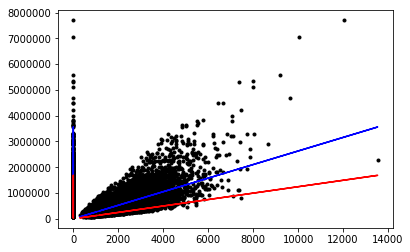

In [57]:
plt.plot(simple_feature_matrix, output, "k.",
        simple_feature_matrix, predict_output(simple_feature_matrix, simple_weights_0_penalty), "b-",
        simple_feature_matrix, predict_output(simple_feature_matrix, simple_weights_high_penalty), "r-")

plt.show()

In [67]:
(test_feature_matrix, output) = get_numpy_data(test_data, simple_features, my_output)

In [68]:
RSS_1 = ((predict_output(test_feature_matrix, initial_weights) - output) ** 2).sum()

In [69]:
RSS_1

1784273282524564.0

In [70]:
RSS_2 = ((predict_output(test_feature_matrix, simple_weights_0_penalty) - output) ** 2).sum()

In [71]:
RSS_2

275723643935160.03

In [72]:
RSS_3 = ((predict_output(test_feature_matrix, simple_weights_high_penalty) - output) ** 2).sum()

In [73]:
RSS_3

694653089851531.5

In [74]:
min(RSS_1, RSS_2, RSS_3)

275723643935160.03

In [75]:
model_features = ["sqft_living", "sqft_living15"]
my_output = "price"
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

In [77]:
initial_weights = np.array([0, 0, 0])
step_size = 1e-12
max_iterations = 1000

5. Question 5
We run ridge regression to learn the weights of a model that has two features (sqft_living, sqft_living15), once with l2_penalty=0.0 and once with l2_penalty=1e11.

What is the value of the coefficient for sqft_living that you learned with no regularization, rounded to 1 decimal place? Use American-style decimals (e.g. 30.5).

In [78]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 0, max_iterations = 1000)

Starting gradient descent with l2_penalty = 0
Iteration = 1
Cost function =  7433051851026171.0
Iteration = 2
Cost function =  4056752331500973.0
Iteration = 3
Cost function =  2529565114333592.0
Iteration = 4
Cost function =  1838556694275926.5
Iteration = 5
Cost function =  1525675575208603.5
Iteration = 6
Cost function =  1383789498674793.8
Iteration = 7
Cost function =  1319232606276634.5
Iteration = 8
Cost function =  1289648872028920.8
Iteration = 9
Cost function =  1275884724079266.8
Iteration = 10
Cost function =  1269278807577156.8
Iteration = 20
Cost function =  1257812386316614.8
Iteration = 30
Cost function =  1251954571266786.0
Iteration = 40
Cost function =  1246755423155437.5
Iteration = 50
Cost function =  1242139508748821.0
Iteration = 60
Cost function =  1238041401137188.0
Iteration = 70
Cost function =  1234403013463993.5
Iteration = 80
Cost function =  1231172774976820.2
Iteration = 90
Cost function =  1228304900059555.0
Iteration = 100
Cost function =  122575873926

In [79]:
multiple_weights_0_penalty

array([1.80292509e-03, 1.87808775e+02, 8.24046825e+01])

6. Question 6
This question refers to the same model as the previous question.

What is the value of the coefficient for sqft_living that you learned with high regularization (l2_penalty=1e11)? Use American-style decimals (e.g. 30.5) and round your answer to 1 decimal place.

In [80]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 1e11, max_iterations = 1000)

Starting gradient descent with l2_penalty = 1e+11
Iteration = 1
Cost function =  7433051851026171.0
Iteration = 2
Cost function =  4460489790285892.0
Iteration = 3
Cost function =  3796674468844609.0
Iteration = 4
Cost function =  3648319530437361.0
Iteration = 5
Cost function =  3615091103216103.0
Iteration = 6
Cost function =  3607602742514732.0
Iteration = 7
Cost function =  3605886322161656.0
Iteration = 8
Cost function =  3605474874533296.0
Iteration = 9
Cost function =  3605365167765576.0
Iteration = 10
Cost function =  3605329402184649.0
Iteration = 20
Cost function =  3605294281022695.0
Iteration = 30
Cost function =  3605293537267100.0
Iteration = 40
Cost function =  3605293082749905.0
Iteration = 50
Cost function =  3605292631106358.0
Iteration = 60
Cost function =  3605292179491500.5
Iteration = 70
Cost function =  3605291727877070.0
Iteration = 80
Cost function =  3605291276262785.0
Iteration = 90
Cost function =  3605290824648642.5
Iteration = 100
Cost function =  36052903

In [81]:
multiple_weights_high_penalty

array([ 0.69480859, 91.49008087, 78.43740306])

7. Question 7
This question refers to the same model as the previous question.

Using all zero weights, make predictions for the TEST data. In which of the following ranges does the TEST error (RSS) fall?

In [82]:
RSS_1 = ((predict_output(test_feature_matrix, initial_weights) - test_output) ** 2).sum()

In [90]:
RSS_1 

1784273282524564.0

In [84]:
RSS_2 = ((predict_output(test_feature_matrix, multiple_weights_0_penalty) - test_output) ** 2).sum()

In [85]:
RSS_2

276002296589805.4

In [86]:
RSS_3 = ((predict_output(test_feature_matrix, multiple_weights_high_penalty) - test_output) ** 2).sum()

In [87]:
RSS_3

500408150014502.5

In [88]:
min(RSS_1, RSS_2, RSS_3)

276002296589805.4

In [106]:
test_feature_matrix, test_output

(array([[1.00e+00, 1.43e+03, 1.78e+03],
        [1.00e+00, 2.95e+03, 2.14e+03],
        [1.00e+00, 1.71e+03, 1.03e+03],
        ...,
        [1.00e+00, 2.52e+03, 2.52e+03],
        [1.00e+00, 2.31e+03, 1.83e+03],
        [1.00e+00, 1.02e+03, 1.02e+03]]),
 array([310000., 650000., 233000., ..., 610685., 400000., 402101.]))

8. Question 8
This question refers to the same model as the previous question.

Predict the price of the first house in the test set using the weights learned with no regularization. Do the same using the weights learned with high regularization. Which weights make better prediction for the first house in the test set?

In [107]:
RSS_0 = (predict_output(test_feature_matrix[0], multiple_weights_0_penalty) - test_output[0]) ** 2
RSS_high = (predict_output(test_feature_matrix[0], multiple_weights_high_penalty) - test_output[0]) ** 2

RSS_0 - RSS_high

9512711163.013275